<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Basic-Math" data-toc-modified-id="Basic-Math-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Basic Math</a></span><ul class="toc-item"><li><span><a href="#Step-1:-Decide-a-Loss-funcion" data-toc-modified-id="Step-1:-Decide-a-Loss-funcion-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Step 1: Decide a Loss funcion</a></span></li><li><span><a href="#Step-2:-Find-the-parameters" data-toc-modified-id="Step-2:-Find-the-parameters-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Step 2: Find the parameters</a></span></li></ul></li><li><span><a href="#Explore-data" data-toc-modified-id="Explore-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Explore data</a></span></li><li><span><a href="#W*-using-Closed-Form-Solution" data-toc-modified-id="W*-using-Closed-Form-Solution-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>W* using Closed Form Solution</a></span></li><li><span><a href="#W*-usinng-Gradient-Descent" data-toc-modified-id="W*-usinng-Gradient-Descent-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>W* usinng Gradient Descent</a></span><ul class="toc-item"><li><span><a href="#With-Symmetric-Loss" data-toc-modified-id="With-Symmetric-Loss-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>With Symmetric Loss</a></span></li><li><span><a href="#Asymmetric-Loss:" data-toc-modified-id="Asymmetric-Loss:-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Asymmetric Loss:</a></span><ul class="toc-item"><li><span><a href="#Penalty-for-Over-Prediction" data-toc-modified-id="Penalty-for-Over-Prediction-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>Penalty for Over Prediction</a></span></li><li><span><a href="#Penalty-for-Under-Prediction" data-toc-modified-id="Penalty-for-Under-Prediction-4.2.2"><span class="toc-item-num">4.2.2&nbsp;&nbsp;</span>Penalty for Under Prediction</a></span></li></ul></li></ul></li><li><span><a href="#Gradient-Descent:-Learning-Rate-and-Max-Iterationn" data-toc-modified-id="Gradient-Descent:-Learning-Rate-and-Max-Iterationn-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Gradient Descent: Learning Rate and Max Iterationn</a></span><ul class="toc-item"><li><span><a href="#Step-3:-Explore-the-data" data-toc-modified-id="Step-3:-Explore-the-data-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Step 3: Explore the data</a></span></li><li><span><a href="#Step-4-:-find-W*-and-define-loss-functions" data-toc-modified-id="Step-4-:-find-W*-and-define-loss-functions-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Step 4 : find W* and define loss functions</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#So-all-the-functions-seem-to-be-working" data-toc-modified-id="So-all-the-functions-seem-to-be-working-5.2.0.1"><span class="toc-item-num">5.2.0.1&nbsp;&nbsp;</span>So all the functions seem to be working</a></span></li></ul></li><li><span><a href="#Best-model-would-be-one-with-6-degrees" data-toc-modified-id="Best-model-would-be-one-with-6-degrees-5.2.1"><span class="toc-item-num">5.2.1&nbsp;&nbsp;</span>Best model would be one with 6 degrees</a></span></li></ul></li></ul></li></ul></div>

# Basic Math

## Step 1: Decide a Loss funcion

    - Let's choose squared loss (standard for Linear Regression)

$$l(y,\hat{y}) = (\hat{y}-y)^2$$ 

    - It is symmetric : would punish under/over prediction equally
    - Its squared: would punish the larger mistakes more than the smaller ones 
    - With all the caveat, let' go ahead with the above loss function
    

## Step 2: Find the parameters 

- Find parameters $w$ such that: 
$$w^{*} = {argmin}_{w}\sum_{i=1}^{N} (y_i - \hat{y})^2$$ 

- And we have a closed form solution for this: 

$$w^* =(X^{T}X)^{-1}X^{T}y $$


# Explore data

In [200]:
## Set up necessary packages

%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import utils # user written functions
%reload_ext autoreload
%autoreload 2

# load some data
# Dataset: Housing price data (very uninteresting, but its fine), against proximity to CBD 

train_data = np.loadtxt('datasets/housing-train.txt')
val_data = np.loadtxt('datasets/housing-val.txt')

# settin up np arrays to work 
# np.newaxis because we need an array in 2 dimension like N*1 than 1 dimensiton like (N,)
X_train = train_data[:,np.newaxis,0]
y_train = train_data[:,np.newaxis,1]
X_val = val_data[:,np.newaxis,0]
y_val = val_data[:,np.newaxis,1]

In [201]:
print(train_data.shape)
print(val_data.shape)

# we dont have much data, but its fine to see the workings

(304, 2)
(101, 2)


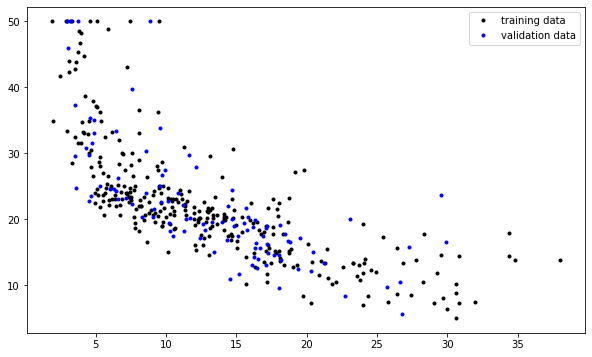

In [205]:
plt.figure(figsize=(10,6))
plt.plot(X_train, y_train, ".k", label="training data") 
plt.plot(X_val, y_val, ".b", label = "validation data") # ideally I should not even see this data, but it's fine here
plt.legend()

- Ideally, i should not even see the validation data, but here the number of observartions is quite low and wanted to make sure the split is random and there is no visible strange pattern. 
- Looking at the data let's try. polynomial of different degrees

# W* using Closed Form Solution

{'degree': 3,
 'w': array([[ 22.54868421],
        [-27.86057496],
        [ 35.31481941],
        [-14.59249952]]),
 'train_loss': array([[15.17538549]]),
 'val_loss': array([[15.62316508]])}

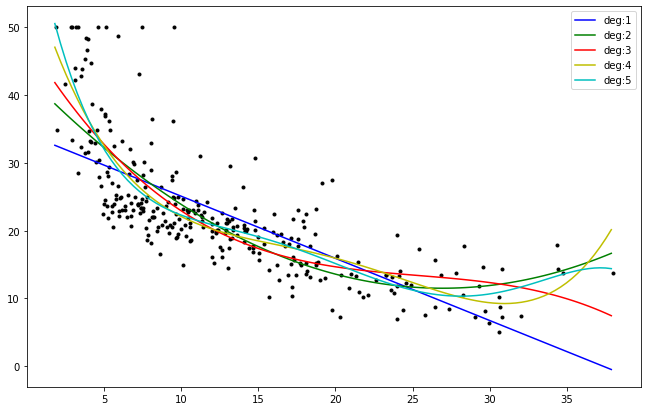

In [231]:
utils.find_best_model_plot_results(X_train, y_train, X_val, y_val, method = 'ClosedForm')

Notes: 
- The best model as per the validation loss is with degree 3

# W* usinng Gradient Descent

## With Symmetric Loss

{'degree': 3,
 'w': array([[ 22.54868421],
        [-26.75997299],
        [ 32.85433846],
        [-13.16404355]]),
 'train_loss': array([[15.18165311]]),
 'val_loss': array([[15.61550846]]),
 'OverPred Penalty': 1,
 'UnderPred Penalty': 1,
 'learning_rate': 0.1}

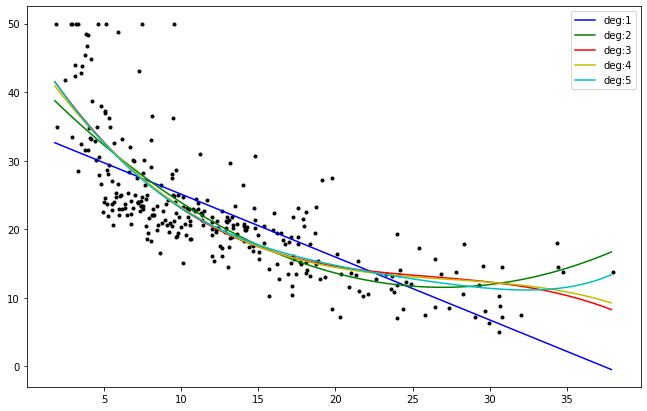

In [260]:
utils.find_best_model_plot_results(X_train, y_train, X_val, y_val, method = 'GradientDescent',
                                  maxIt=20000)

##  Asymmetric Loss: 

### Penalty for Over Prediction

{'degree': 5, 'w': array([[ 18.83362077],
       [-27.78617472],
       [ 44.49316604],
       [-16.72480082],
       [-25.26833502],
       [ 19.34022338]]), 'train_loss': array([[22.14913171]]), 'val_loss': array([[23.00681314]]), 'OverPred Penalty': 10, 'UnderPred Penalty': 1, 'learning_rate': 0.1}


Text(0.5, 1.0, 'With Higher Penalty for Over Prediction')

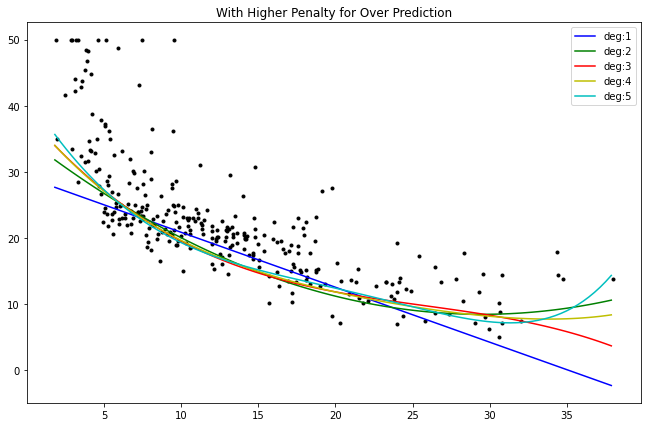

In [261]:
# Over Predictionn ten times as bad as under prediction
bm = utils.find_best_model_plot_results(X_train, y_train, X_val, y_val, method = 'GradientDescent',
                                  overPred_penalty=10, maxIt=20000)
print(bm)
plt.title("With Higher Penalty for Over Prediction")

### Penalty for Under Prediction

{'degree': 3, 'w': array([[ 28.00834341],
       [-32.71368877],
       [ 39.75309201],
       [-15.46566138]]), 'train_loss': array([[31.31677158]]), 'val_loss': array([[29.67433518]]), 'OverPred Penalty': 1, 'UnderPred Penalty': 10, 'learning_rate': 0.1}


Text(0.5, 1.0, 'With Higher Penalty for Under Prediction')

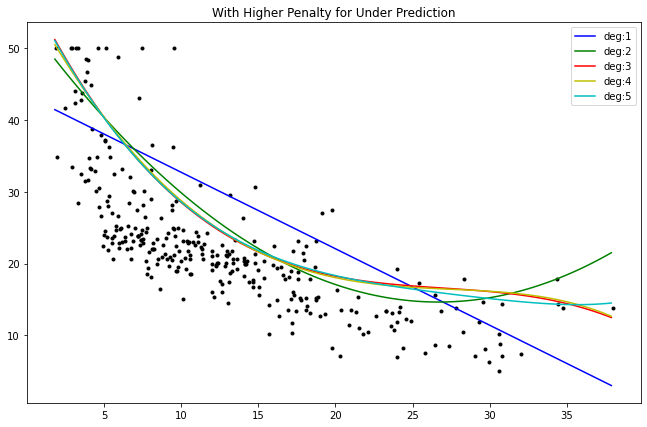

In [259]:
# Under Predictionn ten times as bad as under prediction
bm = utils.find_best_model_plot_results(X_train, y_train, X_val, y_val, method = 'GradientDescent',
                                  underPred_penalty=10)
print(bm)
plt.title("With Higher Penalty for Under Prediction")

# Gradient Descent: Learning Rate and Max Iterationn

In [262]:
# for symmetric loss, the best model is with degrees 3, let's see the convergence for it 

In [337]:
lr = [0.5, 0.1,0.01, 0.001, 0.0001]

X_prep = utils.normaliz_data(utils.prepare_X(X_train,degree=3))[0]

lr_metadata = {}
for l in lr:
    loss = utils.GradDescent_LinReg(X_prep, y_train, lr=l, verbose=True, maxIt=50000)
    lr_metadata[l] = loss

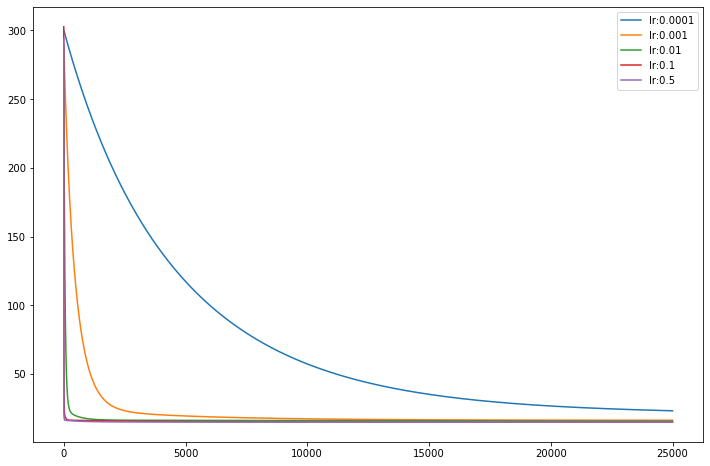

In [342]:
plt.figure(figsize=(12,8))
plt.plot([i for i in range(25000)],lr_metadata[0.0001][0][:25000], label = 'lr:0.0001')
plt.plot([i for i in range(25000)],lr_metadata[0.001][0][:25000], label = 'lr:0.001')
plt.plot([i for i in range(25000)],lr_metadata[0.01][0][:25000], label = 'lr:0.01')
plt.plot([i for i in range(25000)],lr_metadata[0.1][0][:25000], label = 'lr:0.1')
plt.plot([i for i in range(25000)],lr_metadata[0.5][0][:25000], label = 'lr:0.5')
plt.legend()

In [308]:
sum(np.array(lr_metadata[0.5][0]) < np.Inf)

75